In [1]:
%load_ext autoreload
%autoreload 2
import sys
from os import path
import os


sys.path.insert(0, "../../")
sys.path.insert(0, "./")

from isanet.neural_network import MLPRegressor
from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
from isanet.model_selection import Kfold, GridSearchCV
from isanet.metrics import mse, mee, accuracy_binary

import numpy as np
import time
import datetime
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
df1 = pd.DataFrame(load_data("../grid/finer_grid_1_result.data"))
df2 = pd.DataFrame(load_data("../grid/finer_grid_2_result.data"))
df3 = pd.DataFrame(load_data("../grid/finer_grid_3_result.data"))
df4 = pd.DataFrame(load_data("../grid/finer_grid_4_result.data"))
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
result = result.sort_values(by=['mean_val_mse'])
result.reset_index(drop=True, inplace=True)

In [3]:
best_7 = result[:7]
best_7

,hyper_param,fold_results,mean_train_mse,std_train_mse,mean_train_mee,std_train_mee,mean_train_acc,std_train_acc,mean_val_mse,std_val_mse,mean_val_mee,std_val_mee,mean_val_acc,std_val_acc,time_train
0,"{'n_layer_units': [40], 'learning_rate': 0.038...","{'train_mse': [0.5557423336743543, 0.794549919...",0.636228,0.096709,0.873100,0.066309,0.0,0.0,0.974294,0.090384,1.070114,0.029370,0.0,0.0,176.443055
1,"{'n_layer_units': [80], 'learning_rate': 0.046...","{'train_mse': [0.578722747292213, 0.7039064639...",0.659982,0.097366,0.884814,0.064550,0.0,0.0,0.979664,0.068506,1.072059,0.015091,0.0,0.0,270.229524
2,"{'n_layer_units': [70], 'learning_rate': 0.046...","{'train_mse': [0.5160559268844445, 0.734996213...",0.630009,0.102390,0.868294,0.074904,0.0,0.0,0.982111,0.074541,1.075394,0.018151,0.0,0.0,215.996826
3,"{'n_layer_units': [50], 'learning_rate': 0.058...","{'train_mse': [0.6035437242143022, 0.576061109...",0.637327,0.082695,0.865895,0.048704,0.0,0.0,0.983156,0.075906,1.061821,0.015761,0.0,0.0,196.456023
4,"{'n_layer_units': [50], 'learning_rate': 0.058...","{'train_mse': [0.5825062351679748, 0.709804441...",0.640538,0.070004,0.867237,0.045436,0.0,0.0,0.984225,0.099834,1.065146,0.028619,0.0,0.0,126.123179
5,"{'n_layer_units': [70], 'learning_rate': 0.054...","{'train_mse': [0.7916961932048624, 0.737719798...",0.698333,0.101140,0.905407,0.070436,0.0,0.0,0.986333,0.120925,1.068821,0.042273,0.0,0.0,315.580851
6,"{'n_layer_units': [50], 'learning_rate': 0.03,...","{'train_mse': [0.5447015107327392, 0.739299704...",0.663209,0.101034,0.887644,0.066037,0.0,0.0,0.991027,0.059572,1.079616,0.010029,0.0,0.0,361.331167


In [4]:
for index, row in best_7.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    print(row['hyper_param'])

----------------------------------
             Comb 0              
{'n_layer_units': [40], 'learning_rate': 0.038, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0002, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 1              
{'n_layer_units': [80], 'learning_rate': 0.046, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0003, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 2              
{'n_layer_units': [70], 'learning_rate': 0.046, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0002, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 3              
{'n_layer_units': [50], 'learning_rate': 0.058, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.

----------------------------------
             Comb 0              
----------------------------------
{'n_layer_units': [40], 'learning_rate': 0.038, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0002, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.5557423336743543, 0.7945499190011392, 0.5596410119543891, 0.634979732431823]
val mse folds: [1.0431174553153515, 0.9879553757261257, 1.0433972838152874, 0.822707774876484]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.5557423336743543 
MSE val: 1.0431174553153515 


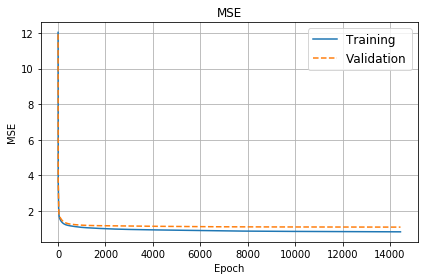

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


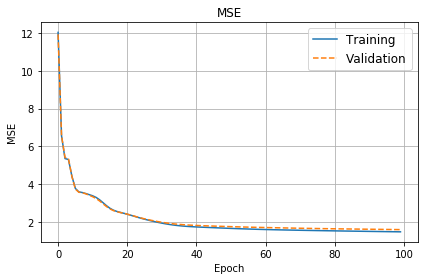

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


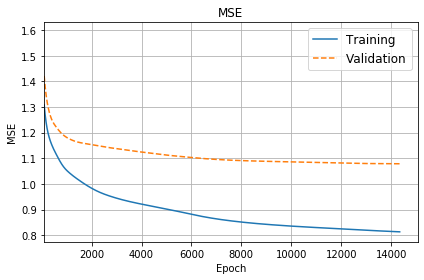

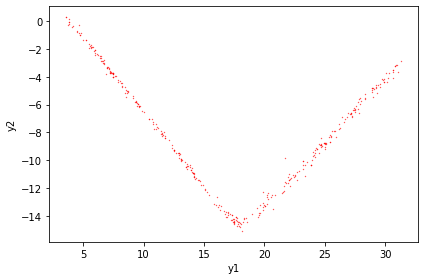

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7945499190011392 
MSE val: 0.9879553757261257 


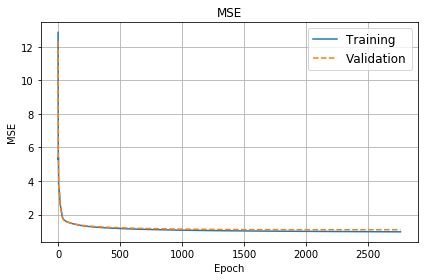

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


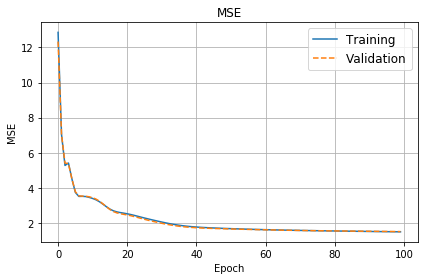

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


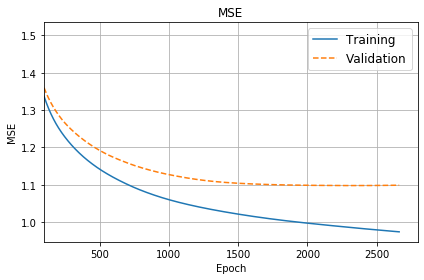

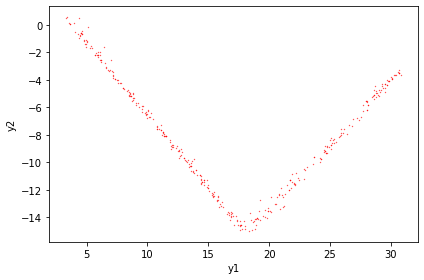

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5596410119543891 
MSE val: 1.0433972838152874 


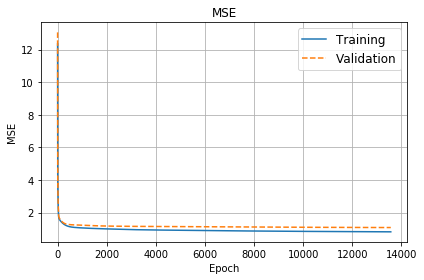

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


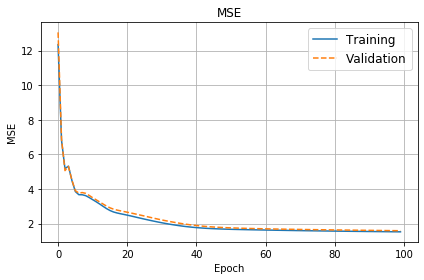

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


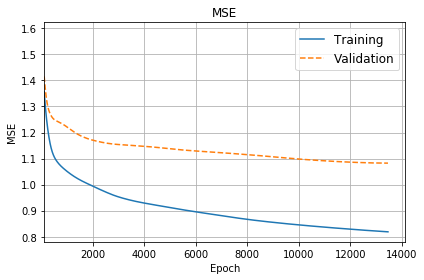

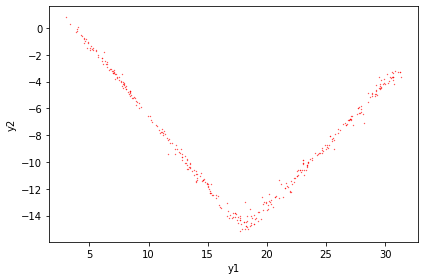

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.634979732431823 
MSE val: 0.822707774876484 


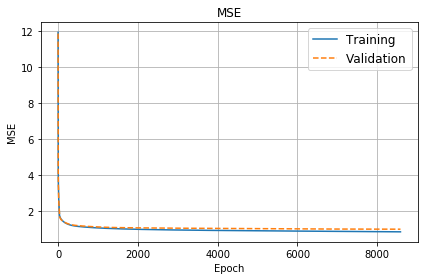

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


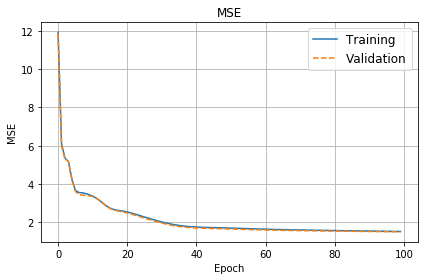

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


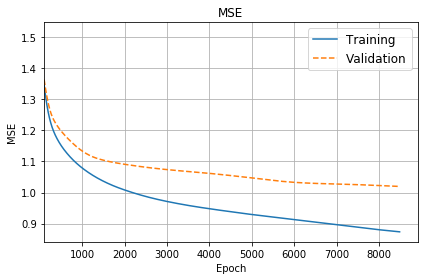

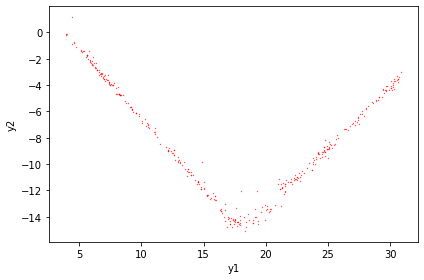

training: 0.6362282492654264+/-0.0967094843198668
validation: 0.9742944724333122+/-0.09038383244341214
----------------------------------
             Comb 1              
----------------------------------
{'n_layer_units': [80], 'learning_rate': 0.046, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0003, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.578722747292213, 0.7039064639217041, 0.5588777618290978, 0.7984228196102588]
val mse folds: [1.026217971907609, 0.9334488401963875, 1.0645520503418628, 0.8944384234221485]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.578722747292213 
MSE val: 1.026217971907609 


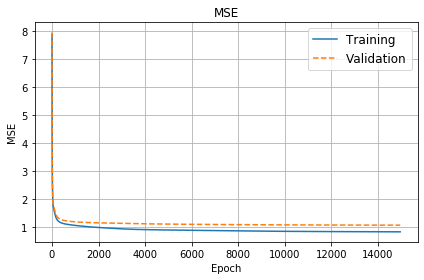

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


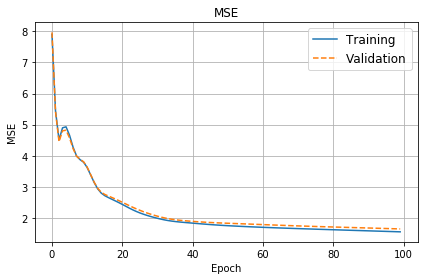

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


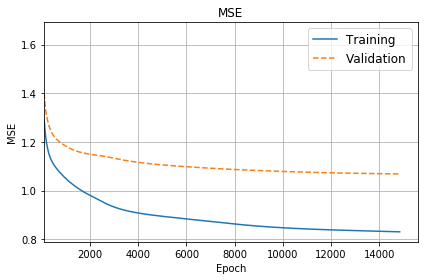

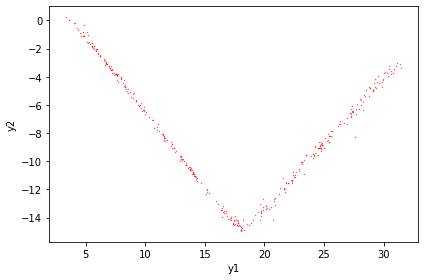

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7039064639217041 
MSE val: 0.9334488401963875 


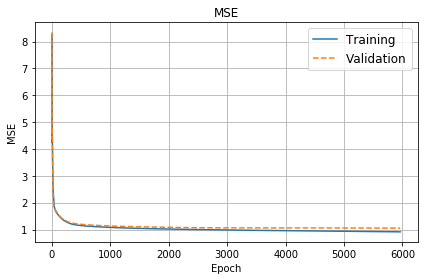

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


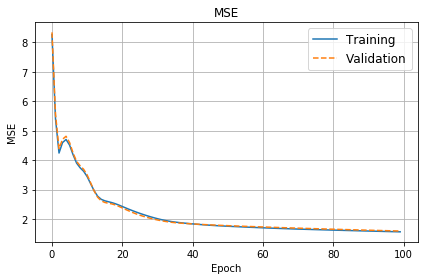

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


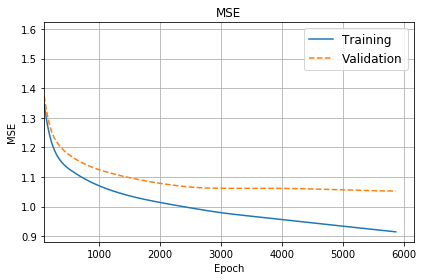

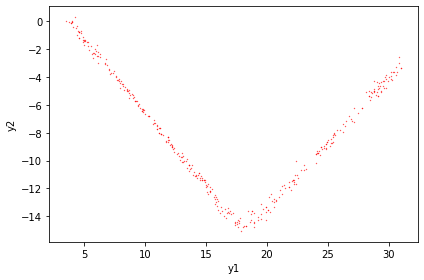

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5588777618290978 
MSE val: 1.0645520503418628 


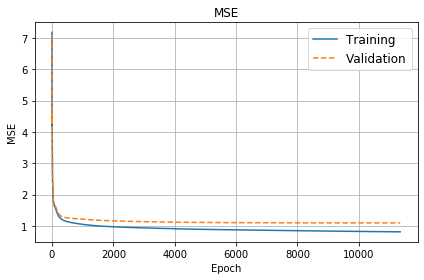

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


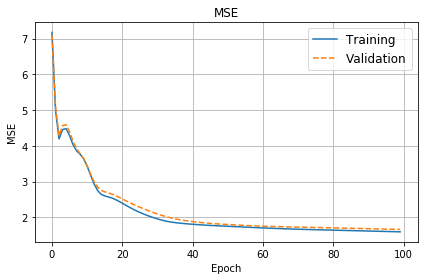

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


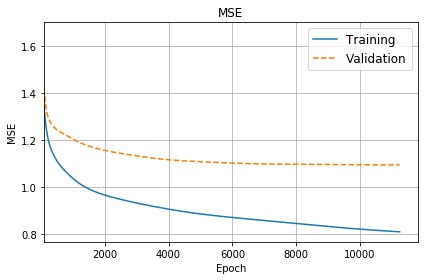

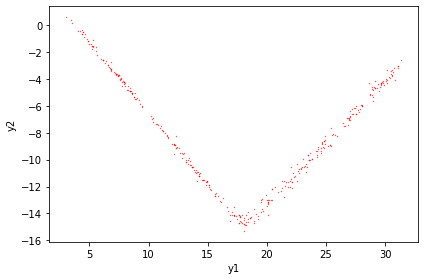

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7984228196102588 
MSE val: 0.8944384234221485 


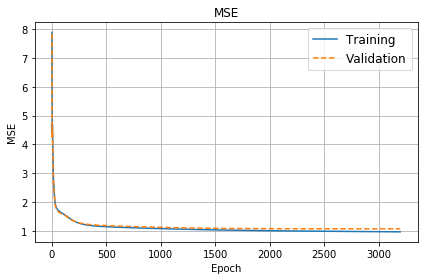

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


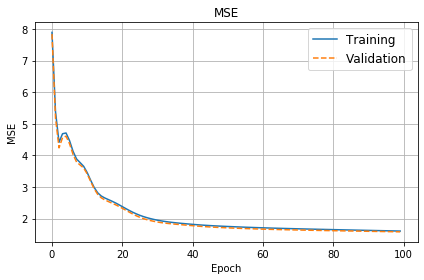

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


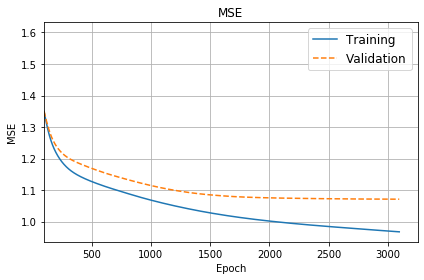

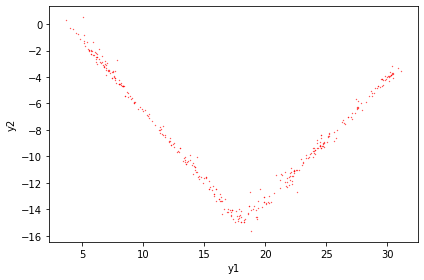

training: 0.6599824481633184+/-0.09736574370782626
validation: 0.9796643214670019+/-0.06850637431930037
----------------------------------
             Comb 2              
----------------------------------
{'n_layer_units': [70], 'learning_rate': 0.046, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0002, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.5160559268844445, 0.7349962139272022, 0.539922139787598, 0.7290603946069472]
val mse folds: [1.047699873436216, 0.9690185516291571, 1.0463452307338588, 0.8653811448357565]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.5160559268844445 
MSE val: 1.047699873436216 


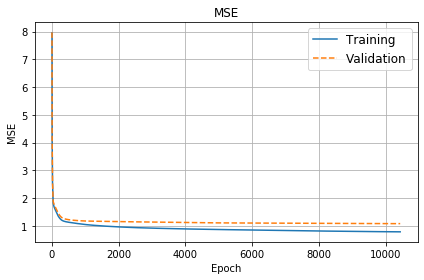

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


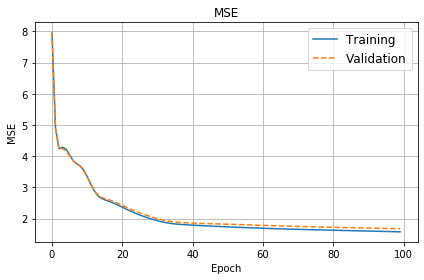

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


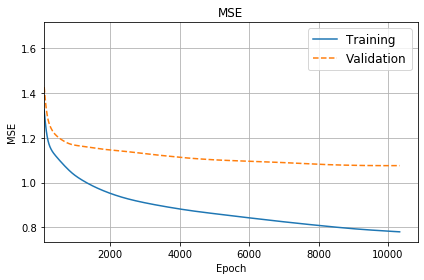

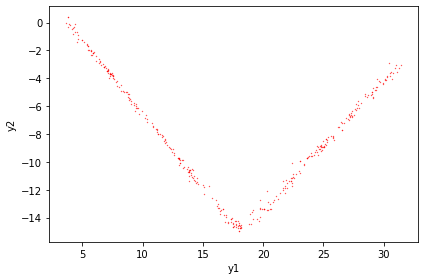

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7349962139272022 
MSE val: 0.9690185516291571 


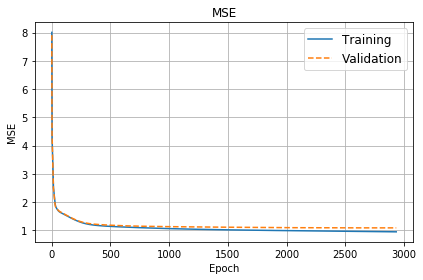

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


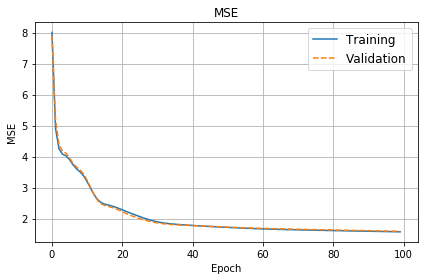

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


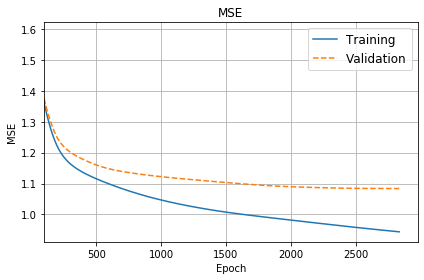

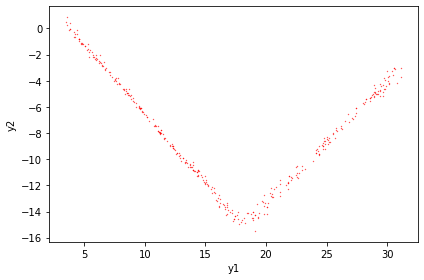

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.539922139787598 
MSE val: 1.0463452307338588 


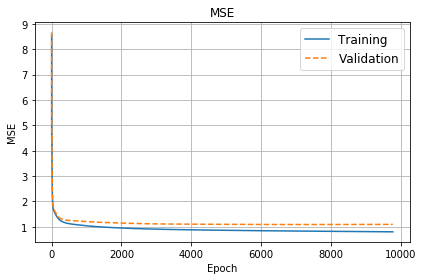

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


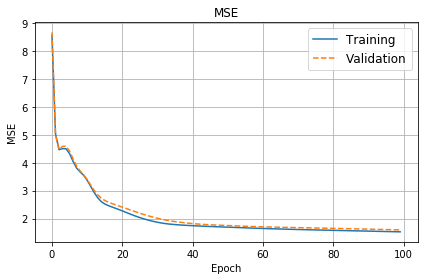

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


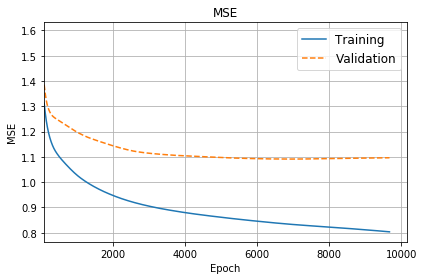

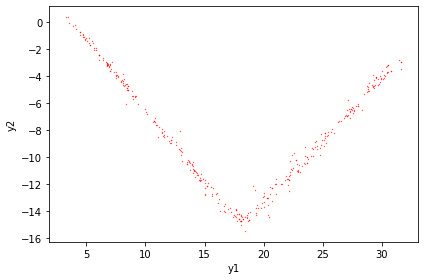

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7290603946069472 
MSE val: 0.8653811448357565 


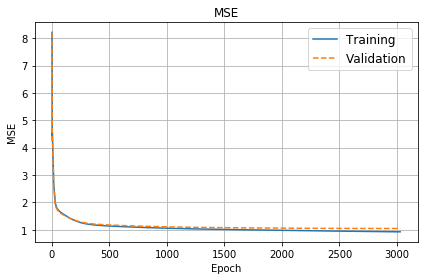

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


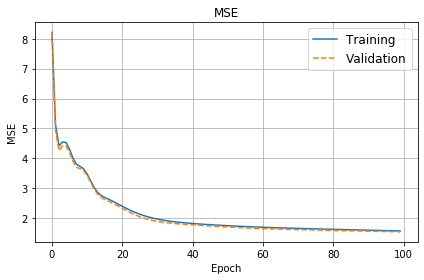

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


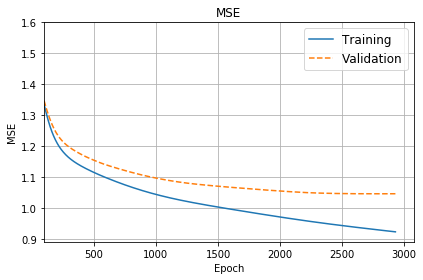

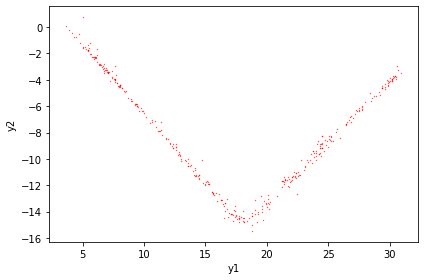

training: 0.6300086688015479+/-0.10238950033663916
validation: 0.9821112001587471+/-0.07454060639586113
----------------------------------
             Comb 3              
----------------------------------
{'n_layer_units': [50], 'learning_rate': 0.058, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0005, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.6035437242143022, 0.5760611097551522, 0.5901367825393575, 0.7795674214116173]
val mse folds: [1.045165760179923, 0.9502956770461375, 1.0626480909199996, 0.8745157818509245]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.6035437242143022 
MSE val: 1.045165760179923 


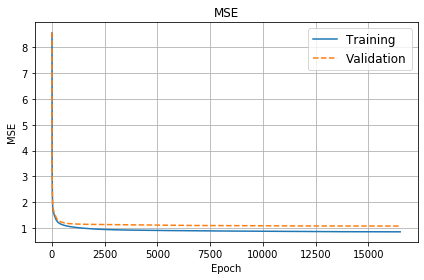

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


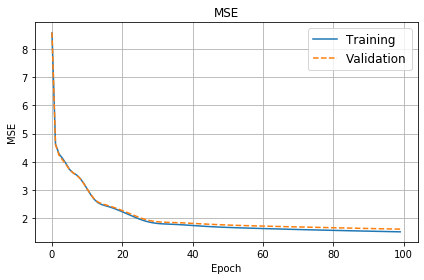

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


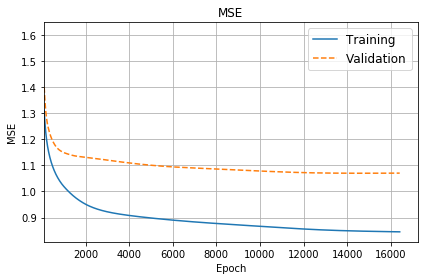

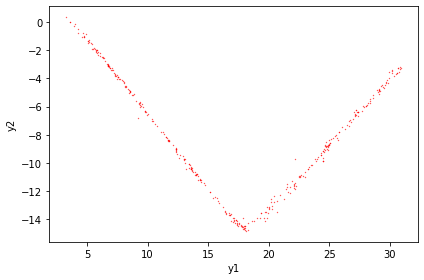

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.5760611097551522 
MSE val: 0.9502956770461375 


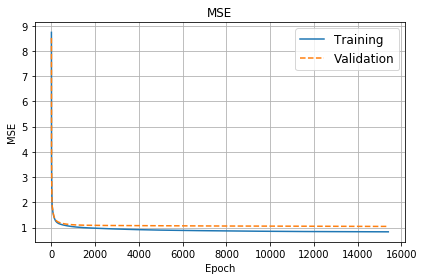

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


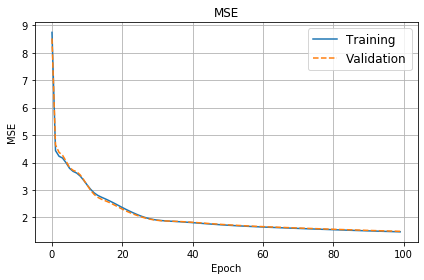

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


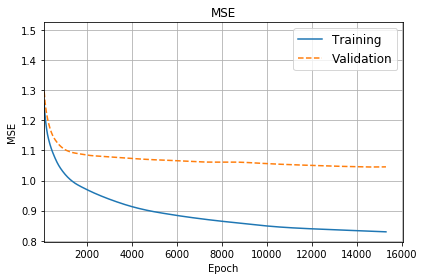

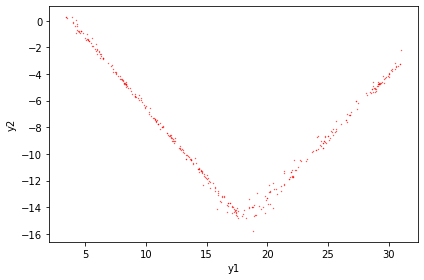

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5901367825393575 
MSE val: 1.0626480909199996 


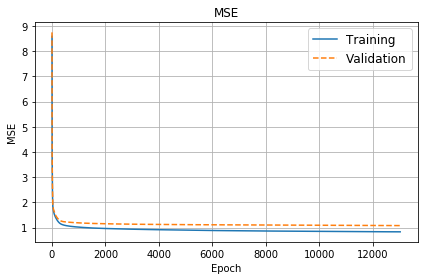

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


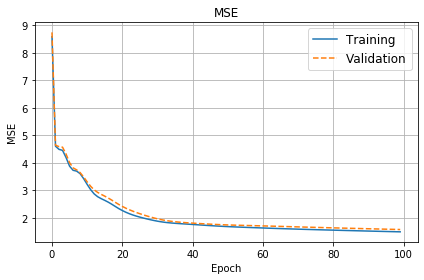

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


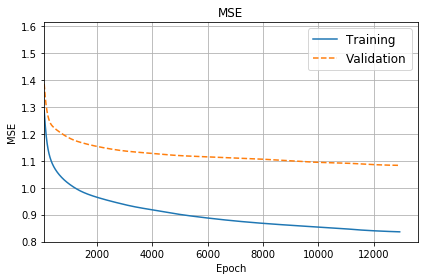

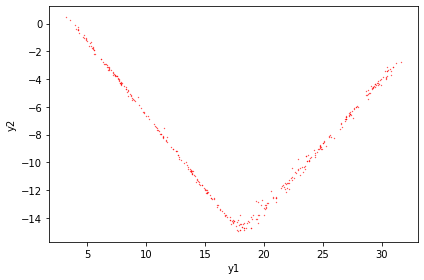

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7795674214116173 
MSE val: 0.8745157818509245 


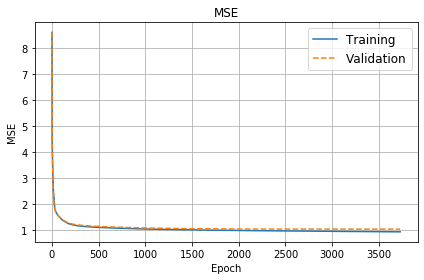

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


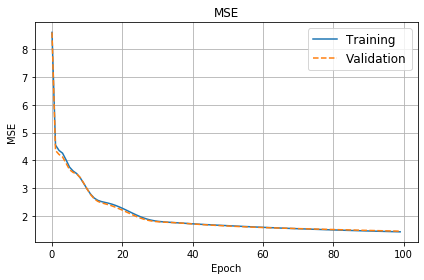

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


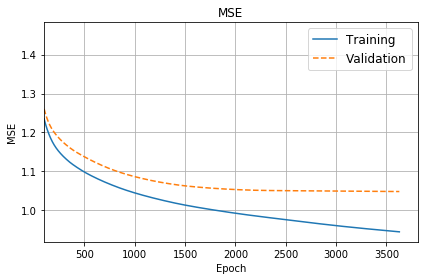

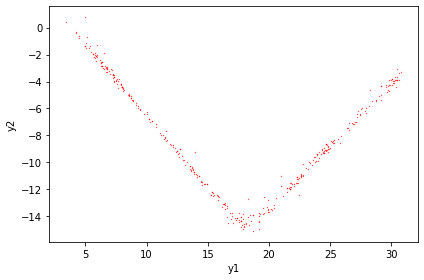

training: 0.6373272594801074+/-0.08269533411471007
validation: 0.9831563274992462+/-0.07590569922622224
----------------------------------
             Comb 4              
----------------------------------
{'n_layer_units': [50], 'learning_rate': 0.058, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0004, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.5825062351679748, 0.709804441528802, 0.5595092780389617, 0.7103312217331742]
val mse folds: [1.1079986837247888, 0.9290089362170675, 1.0477940102720114, 0.852099073585153]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.5825062351679748 
MSE val: 1.1079986837247888 


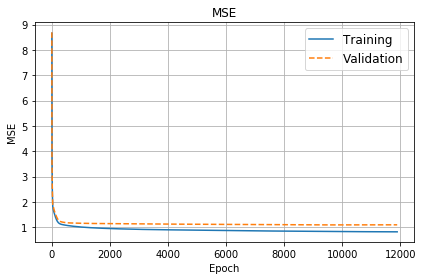

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


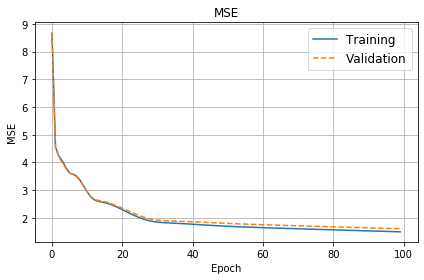

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


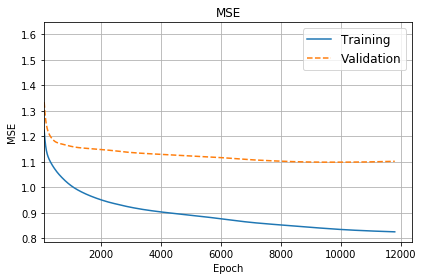

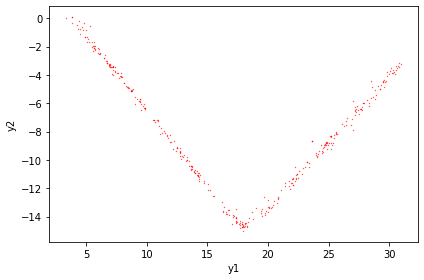

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.709804441528802 
MSE val: 0.9290089362170675 


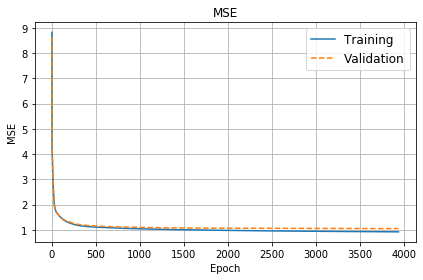

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


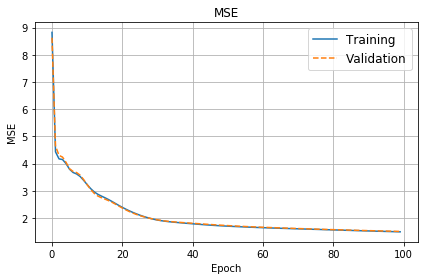

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


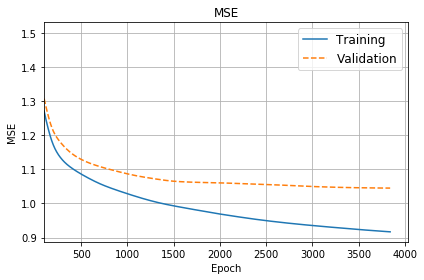

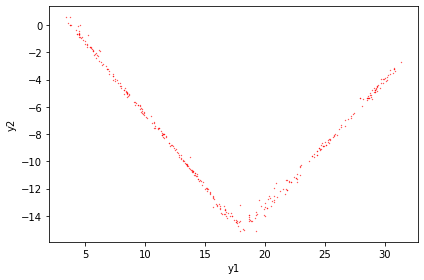

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5595092780389617 
MSE val: 1.0477940102720114 


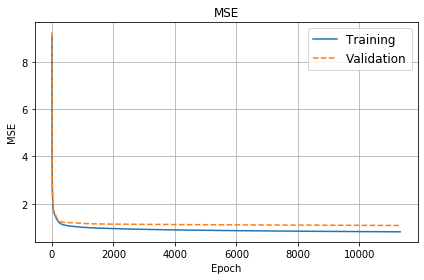

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


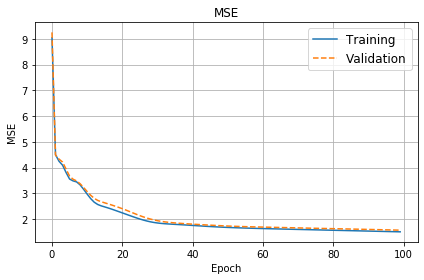

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


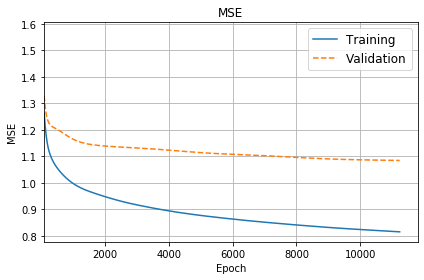

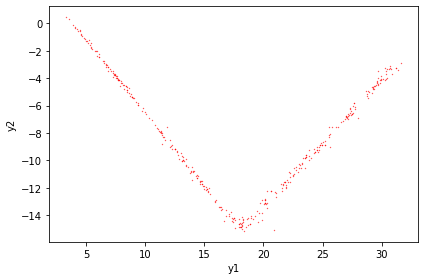

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7103312217331742 
MSE val: 0.852099073585153 


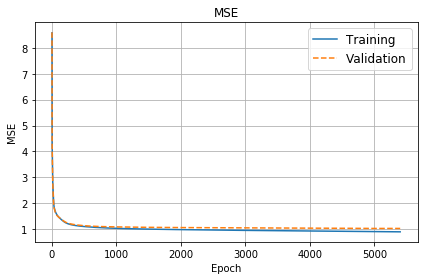

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


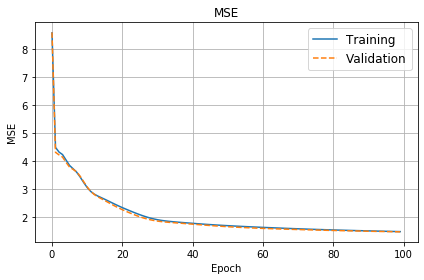

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


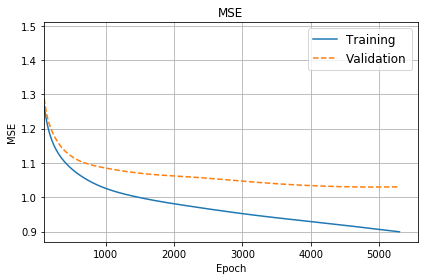

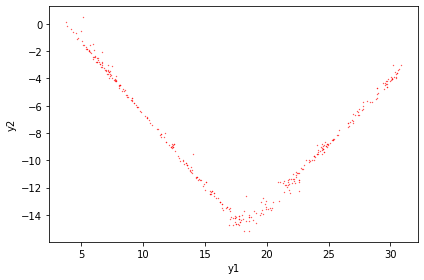

training: 0.6405377941172282+/-0.0700040592286407
validation: 0.9842251759497551+/-0.09983363408729762
----------------------------------
             Comb 5              
----------------------------------
{'n_layer_units': [70], 'learning_rate': 0.054, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0004, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.7916961932048624, 0.7377197986411254, 0.5274641986960319, 0.7364522298666532]
val mse folds: [1.1807340063265022, 0.9162335794964859, 0.987662444503636, 0.8607002026095709]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.7916961932048624 
MSE val: 1.1807340063265022 


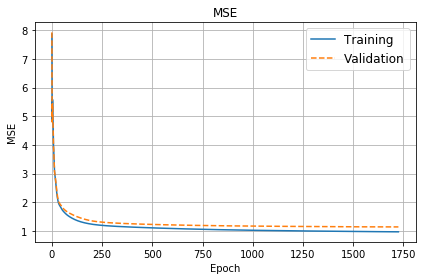

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


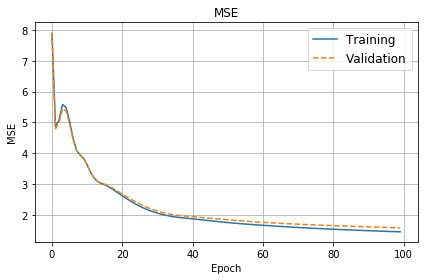

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


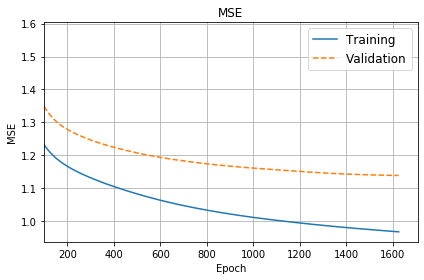

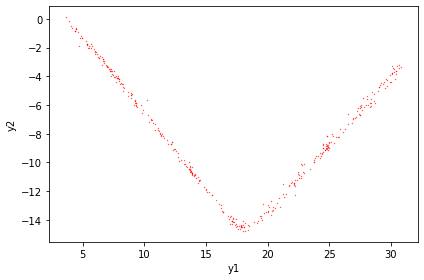

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7377197986411254 
MSE val: 0.9162335794964859 


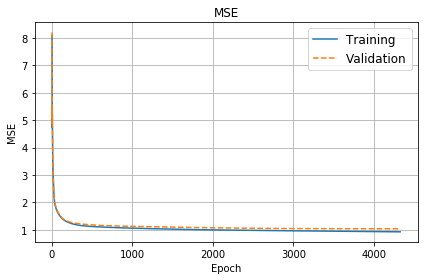

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


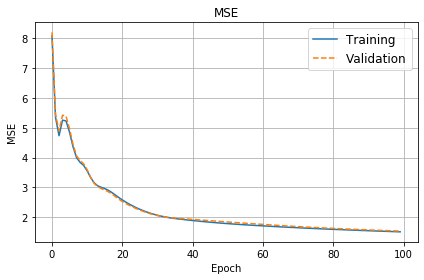

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


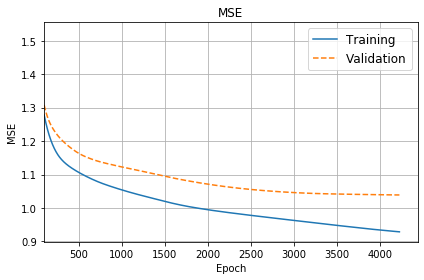

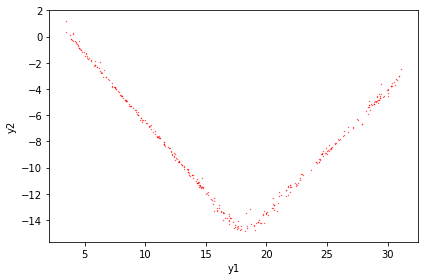

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5274641986960319 
MSE val: 0.987662444503636 


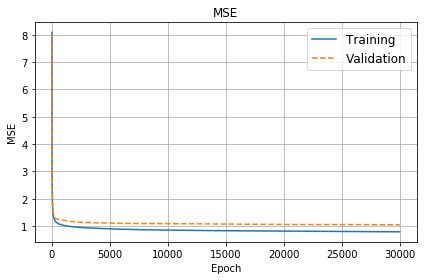

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


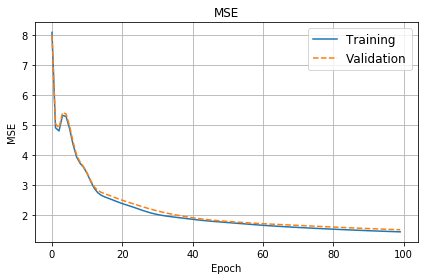

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


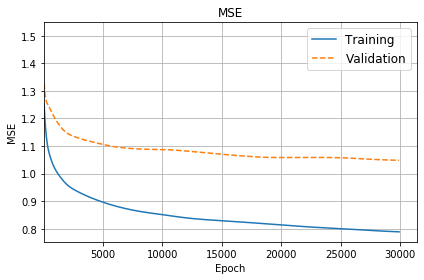

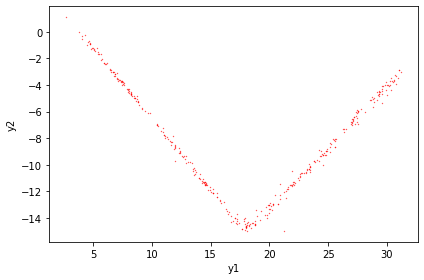

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.7364522298666532 
MSE val: 0.8607002026095709 


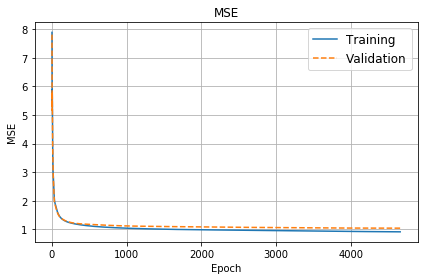

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


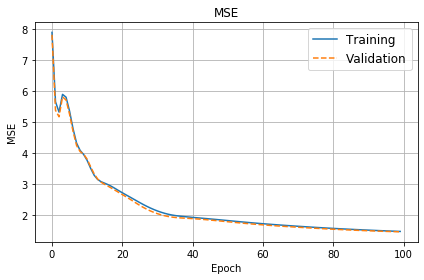

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


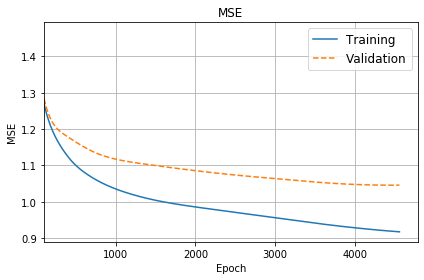

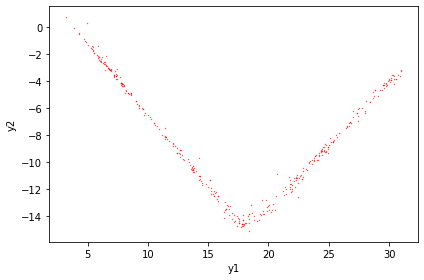

training: 0.6983331051021682+/-0.10114003744467681
validation: 0.9863325582340488+/-0.12092461207063832
----------------------------------
             Comb 6              
----------------------------------
{'n_layer_units': [50], 'learning_rate': 0.03, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0002, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
train mse folds: [0.5447015107327392, 0.7392997047078124, 0.5841738039782239, 0.784661503421955]
val mse folds: [1.0640927308750883, 0.9760633096489972, 1.0209018102446439, 0.9030485388045983]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 0              
MSE val: 0.5447015107327392 
MSE val: 1.0640927308750883 


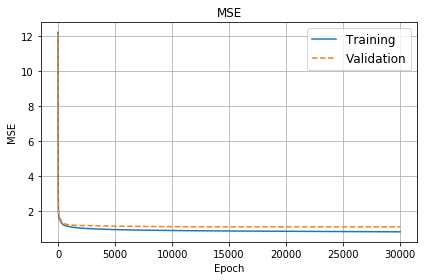

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


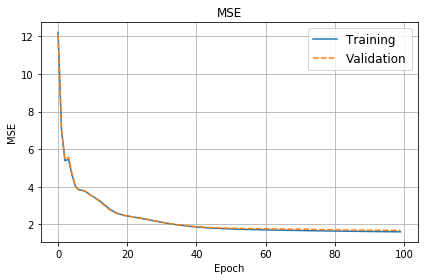

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


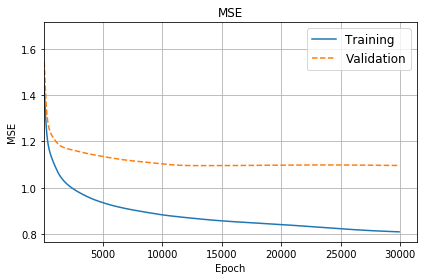

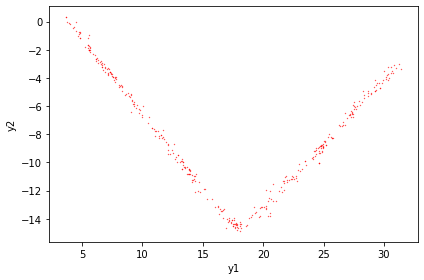

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 1              
MSE val: 0.7392997047078124 
MSE val: 0.9760633096489972 


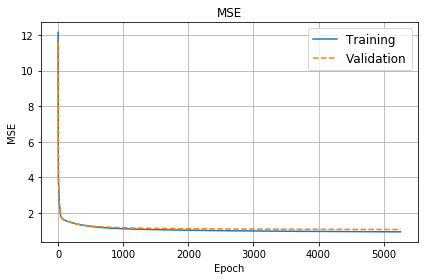

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


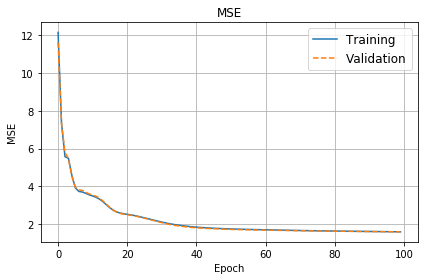

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


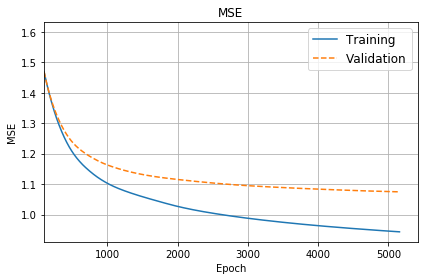

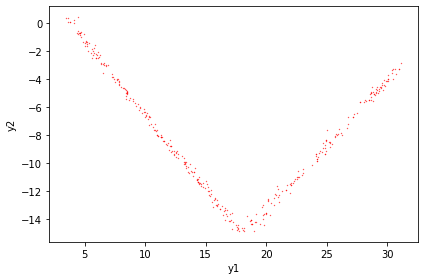

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 2              
MSE val: 0.5841738039782239 
MSE val: 1.0209018102446439 


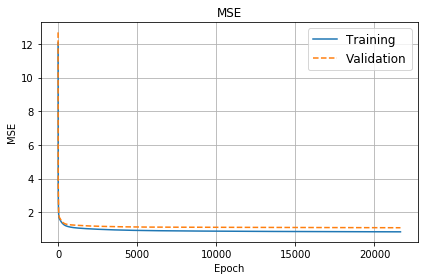

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


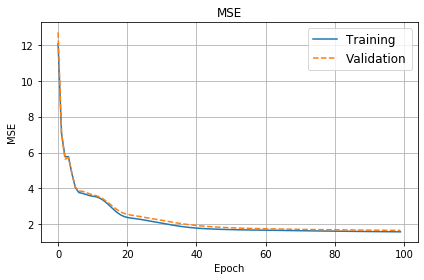

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


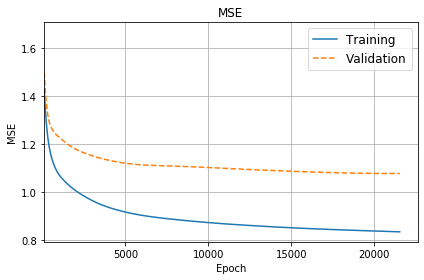

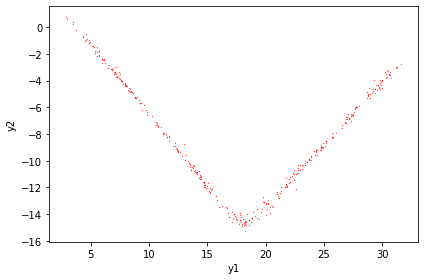

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


----------------------------------
             Fold 3              
MSE val: 0.784661503421955 
MSE val: 0.9030485388045983 


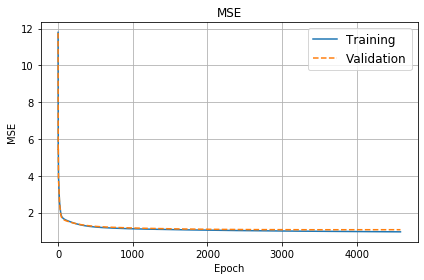

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


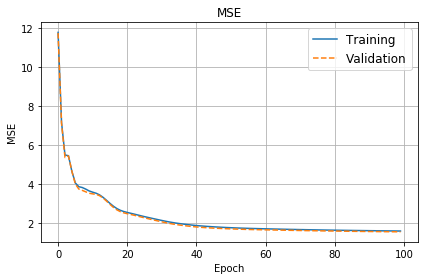

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


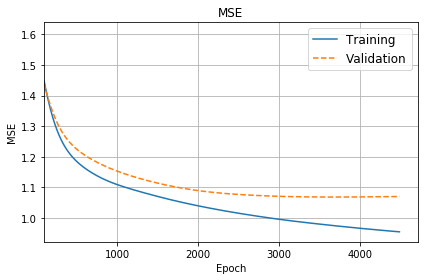

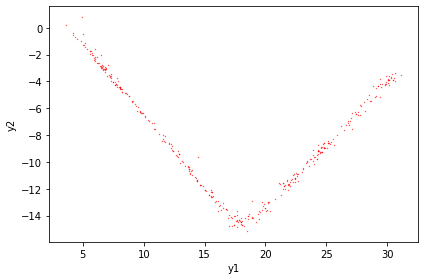

training: 0.6632091307101826+/-0.10103352556571708
validation: 0.9910265973933319+/-0.059571862019848404


In [6]:
dataset_f = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_tr_vl_10.csv',delimiter=',')
kfold = load_data("../dataset/cup10/4folds.index")
for index, row in best_7.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    print("----------------------------------")
    print(row['hyper_param'])
    print("train mse folds: {}".format(row['fold_results']["train_mse"]))
    print("val mse folds: {}".format(row['fold_results']["val_mse"]))
    W = copy.deepcopy(row["fold_results"]["init_weigth"])
    
    num_unit = row['hyper_param']["n_layer_units"][0]
    lr = row['hyper_param']["learning_rate"]
    max_epoch = 30000
    momentum = row['hyper_param']["momentum"]
    kernel_regularizer = row['hyper_param']["kernel_regularizer"]
    es = EarlyStopping(0.009, 200, verbose = 0)

    mean_tr_mse = []
    mean_vl_mse = []
    i = 0
    for train_index_fold, val_index_fold, w in zip(kfold["train"], kfold["val"], W):                
        X_train = dataset_f[train_index_fold,:-2]
        Y_train = dataset_f[train_index_fold,-2:]

        X_val = dataset_f[val_index_fold,:-2]
        Y_val = dataset_f[val_index_fold,-2:]

        model = Mlp()
        model.add(num_unit, activation="sigmoid", input= 10, kernel_initializer = np.sqrt(6)/np.sqrt(num_unit + 20), kernel_regularizer = kernel_regularizer)
        model.add(2, activation="linear", kernel_initializer = np.sqrt(6)/np.sqrt(2 + num_unit), kernel_regularizer = kernel_regularizer)

        model.set_optimizer(
            SGD(
                lr = lr,
                momentum = momentum,
                nesterov = True
            )
        )
        model.weights = w

        start_time = time.time()
        model.fit(X_train,
                    Y_train, 
                    epochs=max_epoch, 
                    validation_data = [X_val, Y_val],
                    es = es,
                    verbose=0) 

        out = model.predict(X_train)
        delta = Y_train - out
        mean_tr_mse.append(np.mean(np.square(delta)))

        outputNet = model.predict(X_val)
        delta = Y_val - outputNet
        mean_vl_mse.append(np.mean(np.square(delta)))


        print("----------------------------------")
        print("             Fold {}              ".format(i))
        outputNet = model.predict(X_train)
        printMSE(outputNet, Y_train, type = "val")
        outputNet = model.predict(X_val)    
        printMSE(outputNet, Y_val, type = "val")

        plt.plot(model.history["loss_mee"])
        plt.plot(model.history["val_loss_mee"], linestyle='--')
        plt.title('MSE')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
        plt.grid()
        plt.tight_layout()
        plt.savefig("finer_grid_img/model_"+str(index)+"/fold"+str(i)+"/full.eps")
        plt.show()

        plt.plot(model.history["loss_mee"][:100])
        plt.plot(model.history["val_loss_mee"][:100], linestyle='--')
        plt.title('MSE')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
        plt.grid()
        plt.tight_layout()
        plt.savefig("finer_grid_img/model_"+str(index)+"/fold"+str(i)+"/before_100.eps")
        plt.show()

        plt.plot(model.history["loss_mee"][100:])
        plt.plot(model.history["val_loss_mee"][100:], linestyle='--')
        plt.title('MSE')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
        plt.grid()
        plt.xlim(left = 100)
        plt.tight_layout()
        plt.savefig("finer_grid_img/model_"+str(index)+"/fold"+str(i)+"/after_100.eps")
        plt.show()

        plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
        plt.ylabel('y2')
        plt.xlabel('y1')
        plt.tight_layout()
        plt.show()
        i += 1

    print("training: {}+/-{}".format(np.mean(mean_tr_mse), np.std(mean_tr_mse)))
    print("validation: {}+/-{}".format(np.mean(mean_vl_mse), np.std(mean_vl_mse)))

In [3]:
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
result = result.sort_values(by=['mean_val_mse'])
result.reset_index(drop=True, inplace=True)
result = result.sort_values(by=['mean_val_mee'])
best_3 = result[:3]
best_3

,hyper_param,fold_results,mean_train_mse,std_train_mse,mean_train_mee,std_train_mee,mean_train_acc,std_train_acc,mean_val_mse,std_val_mse,mean_val_mee,std_val_mee,mean_val_acc,std_val_acc,time_train
3,"{'n_layer_units': [50], 'learning_rate': 0.058...","{'train_mse': [0.6035437242143022, 0.576061109...",0.637327,0.082695,0.865895,0.048704,0.0,0.0,0.983156,0.075906,1.061821,0.015761,0.0,0.0,196.456023
4,"{'n_layer_units': [50], 'learning_rate': 0.058...","{'train_mse': [0.5825062351679748, 0.709804441...",0.640538,0.070004,0.867237,0.045436,0.0,0.0,0.984225,0.099834,1.065146,0.028619,0.0,0.0,126.123179
5,"{'n_layer_units': [70], 'learning_rate': 0.054...","{'train_mse': [0.7916961932048624, 0.737719798...",0.698333,0.101140,0.905407,0.070436,0.0,0.0,0.986333,0.120925,1.068821,0.042273,0.0,0.0,315.580851


In [10]:
print("Folds time means and std")
for index, row in best_3.iterrows():
    print(row['fold_results']["fold_time"])
    print("Comb {} - mean: {} - std: {}".format(index, np.mean(row['fold_results']["fold_time"]), np.std(row['fold_results']["fold_time"])))

Folds time means and std
[69.34652352333069, 62.54076814651489, 49.84225606918335, 14.679585933685303]
Comb 3 - mean: 49.10228341817856 - std: 21.070665573623632
[46.22537589073181, 15.155472993850708, 44.03512215614319, 20.67889404296875]
Comb 4 - mean: 31.523716270923615 - std: 13.76774881684359
[12.996850728988647, 32.44713234901428, 236.1770122051239, 33.919334411621094]
Comb 5 - mean: 78.88508242368698 - std: 91.18718653358751


In [8]:
dataset = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_test_10.csv',delimiter=',')
X_test = dataset[:,:-2]
Y_test = dataset[:,-2:]

print("Internal Test Result on each folds")  
for index, row in best_3.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    #print("----------------------------------")
    W_final = copy.deepcopy(row["fold_results"]["final_weigth"])
    num_unit = row['hyper_param']["n_layer_units"][0]
    lr = row['hyper_param']["learning_rate"]
    max_epoch = 30000
    momentum = row['hyper_param']["momentum"]
    kernel_regularizer = row['hyper_param']["kernel_regularizer"]
    es = EarlyStopping(0.009, 200, verbose = 0)

    mean_test_mee = []
    i = 0
    for w in W_final:    
        model = Mlp()
        model.add(num_unit, activation="sigmoid", input= 10, kernel_initializer = np.sqrt(6)/np.sqrt(num_unit + 20), kernel_regularizer = kernel_regularizer)
        model.add(2, activation="linear", kernel_initializer = np.sqrt(6)/np.sqrt(2 + num_unit), kernel_regularizer = kernel_regularizer)
        model.weights = w
        
        out = model.predict(X_test)
        mean_test_mee.append(mee(out,Y_test))


        #print(" - Fold {0}  MEE: {1}".format(i, mee(out, Y_test)))

        i += 1

    print(" - test result : {}+/-{}".format(np.mean(mean_test_mee), np.std(mean_test_mee)))

Internal Test Result on each folds
----------------------------------
             Comb 3              
 - test result : 1.013125457089497+/-0.020268265337409972
----------------------------------
             Comb 4              
 - test result : 1.028249573021276+/-0.016805308630569355
----------------------------------
             Comb 5              
 - test result : 1.018448302867306+/-0.015453747276632507


In [4]:
for index, row in best_3.iterrows():
    print("----------------------------------")
    print("             Comb {}              ".format(index))
    print(row['hyper_param'])

----------------------------------
             Comb 3              
{'n_layer_units': [50], 'learning_rate': 0.058, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0005, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 4              
{'n_layer_units': [50], 'learning_rate': 0.058, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0004, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
----------------------------------
             Comb 5              
{'n_layer_units': [70], 'learning_rate': 0.054, 'max_epoch': 30000, 'momentum': 0.9, 'nesterov': True, 'kernel_regularizer': 0.0004, 'activation': 'sigmoid', 'early_stop': eps: 0.009, patience: 200}
